# Version 3.2 – Figure Saving and 1D Plotting Refactor

In this version, we improve the output organization and make the notebook cleaner and production-ready.

###  What we changed:
- Centralized 1D plotting using `plot_initial_final()` from `src.visualization.plotting_1d`
- All saved figures now go to the `figures/` folder (future-proof for paper-ready results)
- Clean test for visual confirmation

> This ensures consistency and keeps notebooks lean.

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(".."))
sys.path.append(os.path.abspath("../src"))

from utils.config_loader import load_config
from visualization.plotting_1d import plot_initial_final

##  Load Configuration and Simulate

We'll load the configuration from `config.yaml`, simulate 1D heat diffusion, and visualize the results using the new plot utility.

In [2]:
import importlib.util

main_path = os.path.abspath("../main.py")
spec = importlib.util.spec_from_file_location("main", main_path)
main = importlib.util.module_from_spec(spec)
spec.loader.exec_module(main)

cfg = load_config("../config.yaml")
cfg["pde"]["type"] = "heat"
cfg["pde"]["dimension"] = 1
cfg["integrator"]["method"] = "rk4"
cfg["output"]["save_animation"] = False
cfg["output"]["save_diagnostics"] = False
cfg["output"]["plot_profile"] = False  # We'll use the cleaner plotting here

u_history = main.run_simulation(cfg)

##  Final Profile Visualization

We use the new `plot_initial_final()` to display and save a clean final plot.

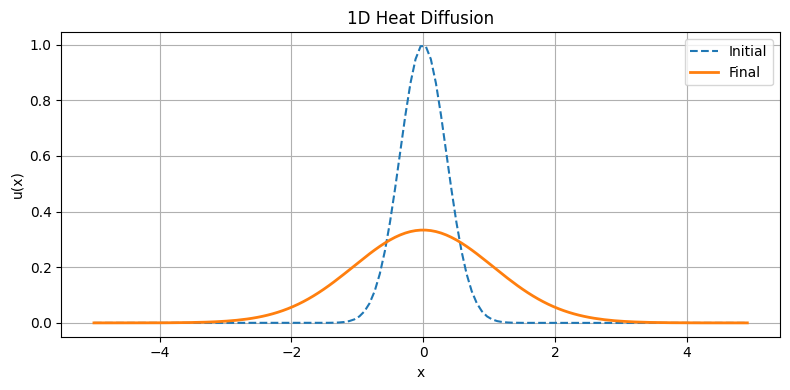

In [3]:
dx = cfg["grid"]["L"] / cfg["grid"]["N"]
x = np.linspace(-cfg["grid"]["L"]/2, cfg["grid"]["L"]/2, cfg["grid"]["N"], endpoint=False)

plot_initial_final(x, u_history[0], u_history[-1], title="1D Heat Diffusion", filename="figures/heat_1d_final.png")

##  Summary

This notebook demonstrates the cleaner post-processing interface:

-  Centralized plotting logic
-  Saved to `figures/` folder for consistency
-  Future-ready layout for embedding in papers or apps

In future versions, this will be automatically triggered from CLI or GUI interfaces.